In [18]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [14]:
## write the right path for any graph embedding do you want to plot it ..
embedding_path = "Graph2-embeddings-GENCONV/allGraphEmbedding.pt"
embeddings = torch.load(embedding_path)
print(embeddings)
print(len(embeddings))

{'protein': tensor([[-1.2150, -1.8456,  0.7261,  ...,  0.1022,  0.5364,  0.0232],
        [-1.4084, -2.0261,  0.6435,  ...,  0.1410,  0.8811,  0.1682],
        [-1.4848, -2.0638,  0.6185,  ...,  0.1135,  1.0128,  0.1417],
        ...,
        [-1.3045, -1.8947,  0.6846,  ...,  0.0606,  0.7702,  0.1861],
        [-1.3942, -2.1243,  0.5060,  ...,  0.2939,  0.8653,  0.0446],
        [ 0.8458, -0.3266, -0.8660,  ..., -0.3281,  0.7730,  1.5504]]), 'lncRNA': tensor([[ 0.2591,  1.0938, -1.7649,  ..., -1.6861,  0.1226, -0.5762],
        [-0.3152, -2.6360, -0.8186,  ..., -0.8786, -0.6473,  1.4126],
        [ 0.3016,  0.8653, -1.8171,  ..., -1.6010,  0.0033, -0.5765],
        ...,
        [ 0.0649,  0.5934, -1.7628,  ..., -1.6543,  0.0415, -0.5022],
        [ 0.3597,  0.7846, -1.8319,  ..., -1.3871, -0.2394, -0.6570],
        [-0.4269, -2.6286, -0.8626,  ..., -0.8863, -0.6449,  1.3915]])}
2


In [15]:
# Combine all node embeddings into one matrix
all_embs = []
all_labels = []

for node_type, emb in embeddings.items():
    all_embs.append(emb)
    all_labels.extend([node_type] * emb.shape[0])

all_embs = torch.cat(all_embs, dim=0).cpu().numpy()
all_labels = np.array(all_labels)


In [16]:
# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
emb_2d = tsne.fit_transform(all_embs)


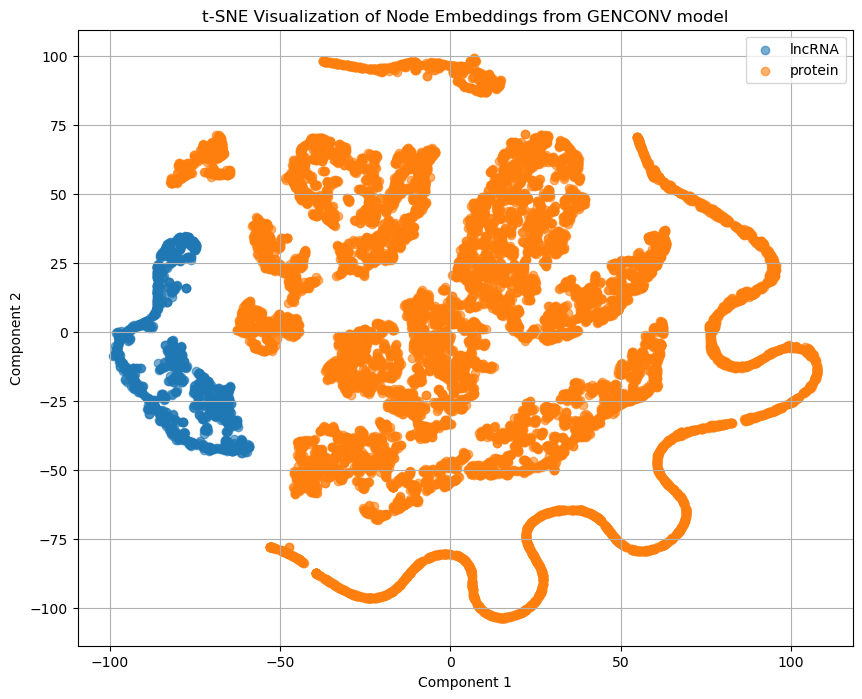

In [20]:
# Plot with color per node type
plt.figure(figsize=(10, 8))
for node_type in np.unique(all_labels):
    idx = all_labels == node_type
    plt.scatter(emb_2d[idx, 0], emb_2d[idx, 1], label=node_type, alpha=0.6)

plt.legend()
plt.title("t-SNE Visualization of Node Embeddings from GENCONV model")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()